In [1]:
# List of available devices

In [1]:
import tensorflow as tf

tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
# MNIST

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_2, x_validation, y_train_2, y_validation = train_test_split(x_train, y_train, test_size = 0.05, random_state = 42)

#Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_validation = x_validation.astype('float32') / 255.0

In [3]:
print(f'X train: {x_train.shape}')
print(f'Y train: {y_train.shape}')
print()
print(f'X test: {x_test.shape}')
print(f'Y test: {y_test.shape}')
print()
print(f'X validation: {x_validation.shape}')
print(f'Y validation: {y_validation.shape}')

X train: (60000, 28, 28)
Y train: (60000,)

X test: (10000, 28, 28)
Y test: (10000,)

X validation: (3000, 28, 28)
Y validation: (3000,)


<AxesSubplot:ylabel='Count'>

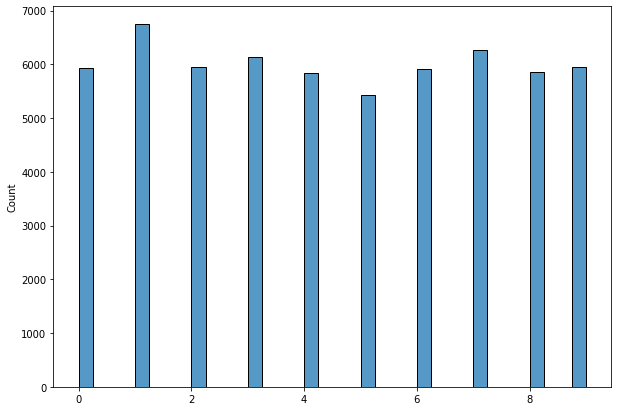

In [4]:
import matplotlib.pyplot as plt
import seaborn

plt.figure(figsize = (10, 7))
seaborn.histplot(y_train)

In [5]:
num_of_classes = len(np.unique(y_train))
num_of_classes

10

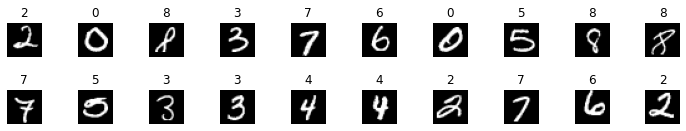

In [6]:
plt.subplots(2, 10, figsize = (10, 2))
plt.tight_layout()
for i in range(0, 20):
    n = np.random.randint(0, x_train.shape[0])
    #n = i
    plt.subplot(2, 10, i + 1)
    plt.axis('off')        
    plt.gca().set_title(y_train[n])
    plt.imshow(x_train[n].reshape(28, 28), cmap = 'gray')       
plt.show()  

In [7]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical  = to_categorical(y_test)
y_validation_categorical  = to_categorical(y_validation)

print(f'Y train (categorical): {y_train_categorical.shape}')
print(f'Y test (categorical): {y_test_categorical.shape}')
print(f'Y validation (categorical): {y_validation_categorical.shape}')

Y train (categorical): (60000, 10)
Y test (categorical): (10000, 10)
Y validation (categorical): (3000, 10)


In [ ]:
# Model build

In [8]:
network = Sequential()
#return_sequences=True, because one of the next layers is recurrent
network.add(LSTM(128, input_shape = (x_train.shape[1:]), return_sequences = True))
network.add(Dropout(0.2))
network.add(LSTM(128))
network.add(Dropout(0.2))
network.add(Dense(64, activation = 'relu'))
network.add(Dense(num_of_classes, activation='softmax'))
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 220,874
Trainable params: 220,874
Non-trai

In [9]:
import time
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 5, patience = 4)
tic = time.perf_counter()
network.fit(x_train, y_train_categorical, validation_data = (x_validation, y_validation_categorical), epochs = 10, callbacks = [es])
toc = time.perf_counter()
print()
print(f"model.fit operation took {((toc - tic) / 60):0.2f} minutes")

_, accuracy = network.evaluate(x_test, y_test_categorical)  

print()
print(f'Accuracy: {accuracy * 100:.2f}')

Epoch 1/10
1875/1875 [==============================] - 37s 17ms/step - loss: 0.3368 - accuracy: 0.8914 - val_loss: 0.0881 - val_accuracy: 0.9707
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0984 - accuracy: 0.9710 - val_loss: 0.0493 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0697 - accuracy: 0.9796 - val_loss: 0.0436 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0559 - accuracy: 0.9832 - val_loss: 0.0327 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0439 - accuracy: 0.9872 - val_loss: 0.0369 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0413 - accuracy: 0.9877 - val_loss: 0.0228 - val_accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 0.0278 -

In [ ]:
# Test

6305
1/1 [==============================] - 0s 34ms/step
9961
1/1 [==============================] - 0s 33ms/step
2210
1/1 [==============================] - 0s 35ms/step
9201
1/1 [==============================] - 0s 34ms/step
594
1/1 [==============================] - 0s 34ms/step
3502
1/1 [==============================] - 0s 35ms/step
6196
1/1 [==============================] - 0s 36ms/step
3896
1/1 [==============================] - 0s 34ms/step
678
1/1 [==============================] - 0s 35ms/step
6174
1/1 [==============================] - 0s 37ms/step
5389
1/1 [==============================] - 0s 39ms/step
9703
1/1 [==============================] - 0s 39ms/step
6361
1/1 [==============================] - 0s 36ms/step
1786
1/1 [==============================] - 0s 35ms/step
2784
1/1 [==============================] - 0s 36ms/step
9693
1/1 [==============================] - 0s 35ms/step
7679
1/1 [==============================] - 0s 36ms/step
9755
1/1 [=======================

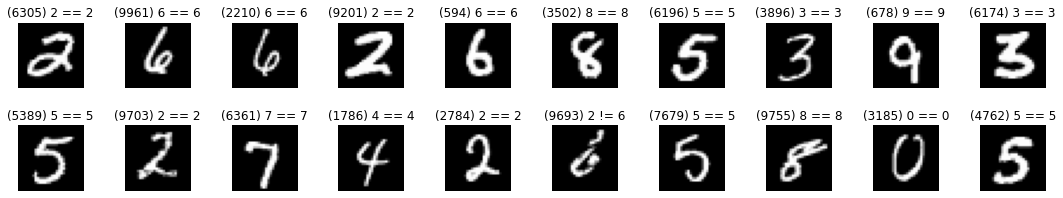


Percentage of right answers: 95.0000


In [16]:
rights = 0
tests = 20

plt.subplots(2, 10, figsize = (15, 3))
plt.tight_layout()
for i in range(0, tests):
    n = np.random.randint(0, x_test.shape[0])
    print(n)
    image = np.reshape(x_test[n], (1, x_test.shape[1], x_test.shape[2]))
    prediction = np.argmax(network.predict(image), axis = 1)
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    predicted_value = prediction[0]
    if (predicted_value == y_test[n]):
        plt.gca().set_title(f"({n}) {predicted_value} == {y_test[n]}")
        rights += 1
    else:
        plt.gca().set_title(f"({n}) {predicted_value} != {y_test[n]}")
    plt.imshow(image.reshape(28, 28), cmap = 'gray')       
plt.show()

print()
print(f"Percentage of right answers: {(rights / tests * 100):0.4f}")

[(8, 8), (115, 9), (247, 2), (321, 7), (340, 3), (412, 3), (449, 5), (582, 2), (583, 3), (674, 3), (763, 5), (791, 9), (995, 5), (1014, 5), (1039, 1), (1182, 5), (1242, 9), (1260, 1), (1299, 7), (1364, 2), (1393, 3), (1395, 3), (1522, 9), (1530, 7), (1549, 6), (1621, 6), (1671, 1), (1681, 7), (1716, 1), (1901, 4), (1982, 5), (2016, 2), (2023, 5), (2035, 3), (2053, 9), (2090, 1), (2129, 8), (2130, 9), (2135, 1), (2148, 9)]


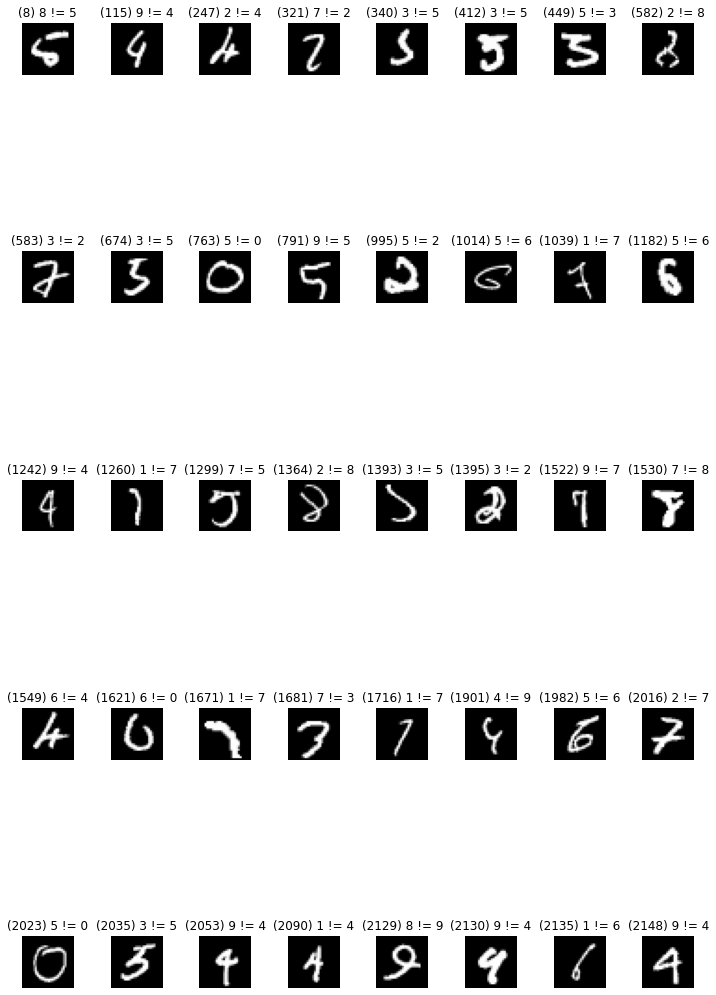

In [33]:
wrongs = 0
threshold = 40
n = 0
indexes_of_images_with_wrong_predicted_values = []
while wrongs < threshold:
    if (n == x_test.shape[0]):
        break
    print(f"{n + 1} out of {x_test.shape[0]}")
    image = np.reshape(x_test[n], (1, x_test.shape[1], x_test.shape[2]))
    prediction = np.argmax(network.predict(image), axis = 1)
    predicted_value = prediction[0]
    if (predicted_value != y_test[n]):
        indexes_of_images_with_wrong_predicted_values.append((n, predicted_value))
        wrongs += 1
    n += 1

print(indexes_of_images_with_wrong_predicted_values)
    
plt.subplots(5, 8, figsize = (10, 16))
plt.tight_layout()
for i in range(0, len(indexes_of_images_with_wrong_predicted_values)):
    index = indexes_of_images_with_wrong_predicted_values[i][0]
    predicted_value = indexes_of_images_with_wrong_predicted_values[i][1]
    image = x_test[index]
    plt.subplot(5, 8, i + 1)
    plt.axis('off')
    plt.gca().set_title(f"({index}) {predicted_value} != {y_test[index]}")
    plt.imshow(image, cmap = 'gray')       
plt.show()

In [ ]:
# Loading and saving model from files

In [35]:
save_path = r"C:\Users\Dexp\Desktop\LSTM_MNIST_Model"
network.save(save_path)

INFO:tensorflow:Assets written to: C:\Users\Dexp\Desktop\LSTM_MNIST_Model\assets


INFO:tensorflow:Assets written to: C:\Users\Dexp\Desktop\LSTM_MNIST_Model\assets


In [36]:
from tensorflow import keras

model2 = keras.models.load_model(save_path)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 220,874
Trainable params: 220,874
Non-trai

In [ ]:
# Test of loaded model

2915
1/1 [==============================] - 1s 908ms/step
1225
1/1 [==============================] - 0s 33ms/step
5867
1/1 [==============================] - 0s 33ms/step
1371
1/1 [==============================] - 0s 34ms/step
7634
1/1 [==============================] - 0s 33ms/step
7745
1/1 [==============================] - 0s 34ms/step
3626
1/1 [==============================] - 0s 38ms/step
1367
1/1 [==============================] - 0s 37ms/step
4428
1/1 [==============================] - 0s 37ms/step
6902
1/1 [==============================] - 0s 33ms/step
9219
1/1 [==============================] - 0s 34ms/step
7234
1/1 [==============================] - 0s 38ms/step
2653
1/1 [==============================] - 0s 37ms/step
5788
1/1 [==============================] - 0s 36ms/step
3617
1/1 [==============================] - 0s 36ms/step
844
1/1 [==============================] - 0s 35ms/step
2940
1/1 [==============================] - 0s 33ms/step
543
1/1 [======================

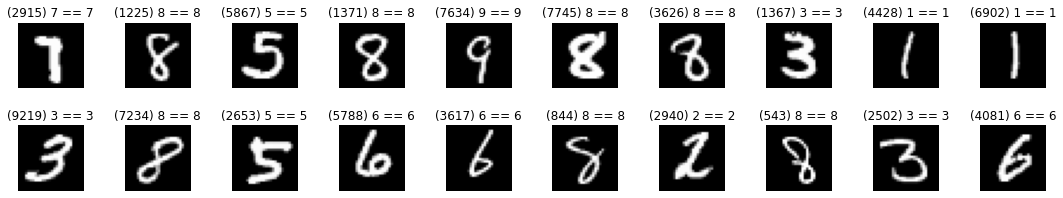


Percentage of right answers: 100.0000


In [38]:
rights = 0
tests = 20

plt.subplots(2, 10, figsize = (15, 3))
plt.tight_layout()
for i in range(0, tests):
    n = np.random.randint(0, x_test.shape[0])
    print(n)
    image = np.reshape(x_test[n], (1, x_test.shape[1], x_test.shape[2]))
    prediction = np.argmax(model2.predict(image), axis = 1)
    plt.subplot(2, 10, i + 1)
    plt.axis('off')
    predicted_value = prediction[0]
    if (predicted_value == y_test[n]):
        plt.gca().set_title(f"({n}) {predicted_value} == {y_test[n]}")
        rights += 1
    else:
        plt.gca().set_title(f"({n}) {predicted_value} != {y_test[n]}")
    plt.imshow(image.reshape(28, 28), cmap = 'gray')       
plt.show()

print()
print(f"Percentage of right answers: {(rights / tests * 100):0.4f}")